In [ ]:
%cd ../..

In [2]:
import tensorflow as tf

from models.lstm_v3.lstm_normalize import SEQUENCE_COLUMNS, TREND_CLASSES, prepare_data, add_lags, split_data, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

tf.keras.backend.clear_session()

---

## For **prepare_data** function

(5959,)
(5959, 19)
index                        int64
Date                datetime64[ns]
Open                       float64
High                       float64
Low                        float64
Close                      float64
Adj Close                  float64
Volume                       int64
Change                     float64
Direction                    int64
MA10                       float64
MA20                       float64
MA50                       float64
MA100                      float64
RSI                        float64
Stochastic_K               float64
Stochastic_D               float64
Short_Term_Trend             int64
Long_Term_Trend              int64
dtype: object


,index,Date,Open,High,Low,Close,Adj Close,Volume,Change,Direction,MA10,MA20,MA50,MA100,RSI,Stochastic_K,Stochastic_D,Short_Term_Trend,Long_Term_Trend
0,99,2000-05-24,1373.859985,1401.750000,1361.089966,1399.050049,1399.050049,1152300000,25.190063,1,1421.276001,1426.065509,1454.346997,1428.297998,44.368469,23.745746,29.372265,0,1
1,100,2000-05-25,1399.050049,1411.650024,1373.930054,1381.520020,1381.520020,984500000,-17.530029,0,1418.646997,1421.895508,1454.134597,1427.560999,41.539809,19.487574,22.178108,0,1
2,101,2000-05-26,1381.520020,1391.420044,1369.750000,1378.020020,1378.020020,722600000,-3.500000,0,1414.353003,1418.175006,1452.525598,1427.346998,40.978078,22.968362,22.067228,0,1
3,102,2000-05-30,1378.020020,1422.449951,1378.020020,1422.449951,1422.449951,844200000,44.429932,1,1411.362000,1415.885004,1451.685198,1427.550398,50.186817,30.103998,24.186645,1,1
4,103,2000-05-31,1422.439941,1434.489990,1415.500000,1420.599976,1420.599976,960500000,-1.839966,0,1406.817993,1414.600500,1450.964597,1427.721898,49.838139,42.021155,31.697838,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,6053,2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000,7.500000,1,4816.775049,4781.978076,4677.269023,4507.758813,72.932465,92.601030,93.015869,2,2
5955,6054,2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000,2.060059,1,4827.848047,4787.447583,4686.857432,4511.510815,72.142640,90.749789,91.389010,2,2
5956,6055,2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000,34.979980,1,4842.258057,4794.676587,4695.502031,4515.821816,75.458828,95.820406,93.057075,2,2
5957,6056,2024-01-30,4925.890137,4931.089844,4916.270020,4924.970215,4924.970215,3836130000,-0.919922,0,4858.157080,4802.433594,4703.943838,4520.416719,74.691975,96.309402,94.293199,2,2


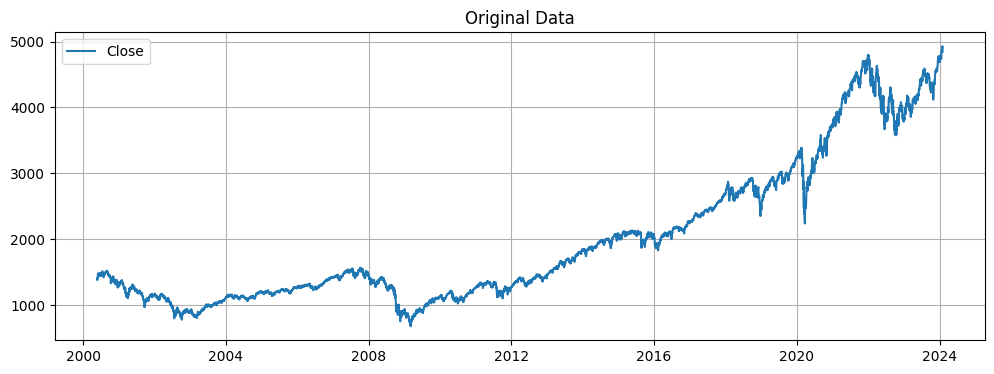

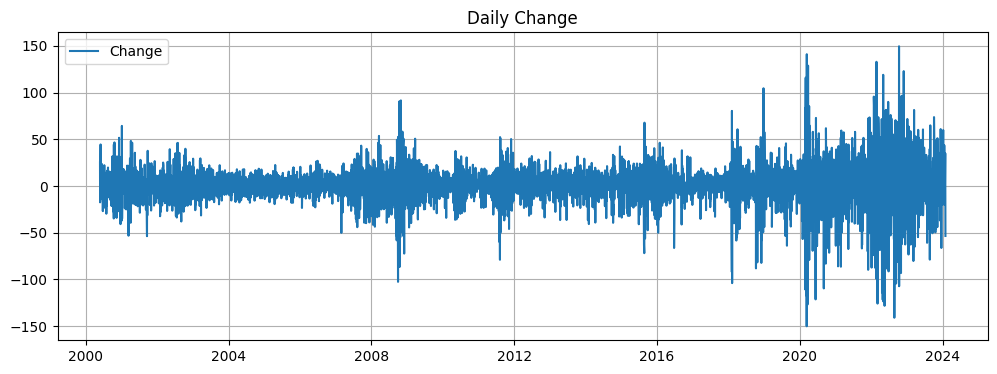

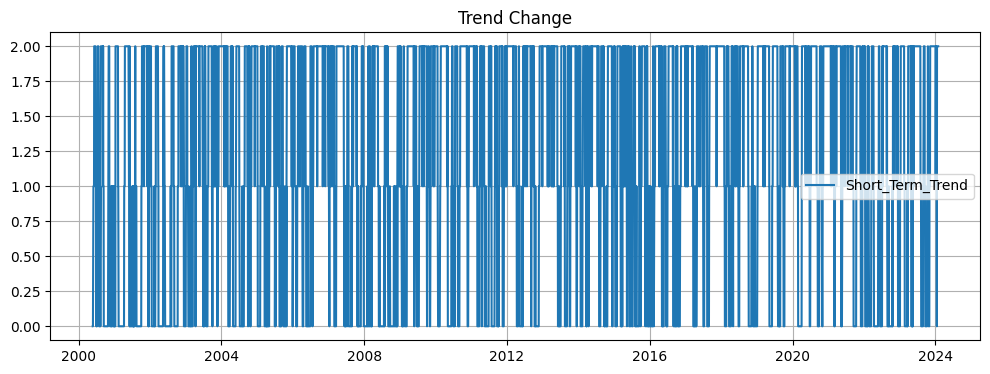

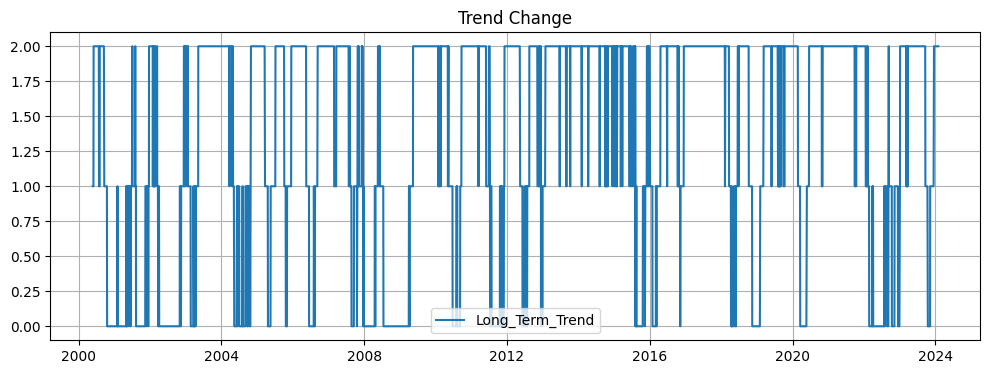

In [3]:
data, target = prepare_data(SP500_TICKER)


# Show data
print(target.shape)
print(data.shape)
print(data.dtypes)

plt = config_chart('Original Data')
plt.plot(data.Date, data.Close)
plt.legend(['Close'])

plt = config_chart('Daily Change')
plt.plot(data.Date, data.Change)
plt.legend(['Change'])

plt = config_chart('Trend Change')
plt.plot(data.Date, data.Short_Term_Trend)
plt.legend(['Short_Term_Trend'])

plt = config_chart('Trend Change')
plt.plot(data.Date, data.Long_Term_Trend)
plt.legend(['Long_Term_Trend'])

data

---

## For add_lags function

In [4]:
# data = add_lags(data)


# Show data
# data

---
## For split_data function

In [5]:
# indicators_train, indicators_test, target_train, target_test = split_data(extended_data)


# # Show data
# indicators_train.shape, indicators_test.shape, target_train.shape, target_test.shape

---

## For **normalize_data** function

In [6]:
# data = normalize_data(data)

# index = 250

# # Show data
# plt = config_chart('Normalized Data')
# plt.plot(data['High'][0:index])
# plt.plot(data['Low'][0:index])
# plt.legend(['Open', 'High', 'Low', 'Close'])

# data

----

## For **prepare_sequences** function

In [7]:
data, target, dates = prepare_sequences(data, target)

# Show data
print(data.shape)
print(target.shape)
print(dates.shape)

print(target[0])
print(data[0])
print(dates[0])


(5949, 10, 3)
(5949,)
(5949, 10)
2
[[1399.05  1421.276 1426.066]
 [1381.52  1418.647 1421.896]
 [1378.02  1414.353 1418.175]
 [1422.45  1411.362 1415.885]
 [1420.6   1406.818 1414.601]
 [1448.81  1406.919 1416.286]
 [1477.26  1410.924 1419.671]
 [1467.63  1416.992 1421.421]
 [1457.84  1422.704 1423.104]
 [1471.36  1432.454 1426.065]]
['2000-05-24T00:00:00.000000000' '2000-05-25T00:00:00.000000000'
 '2000-05-26T00:00:00.000000000' '2000-05-30T00:00:00.000000000'
 '2000-05-31T00:00:00.000000000' '2000-06-01T00:00:00.000000000'
 '2000-06-02T00:00:00.000000000' '2000-06-05T00:00:00.000000000'
 '2000-06-06T00:00:00.000000000' '2000-06-07T00:00:00.000000000']


---

## For **split_train_and_test_data** function

(4759, 10, 3)
(4759,)


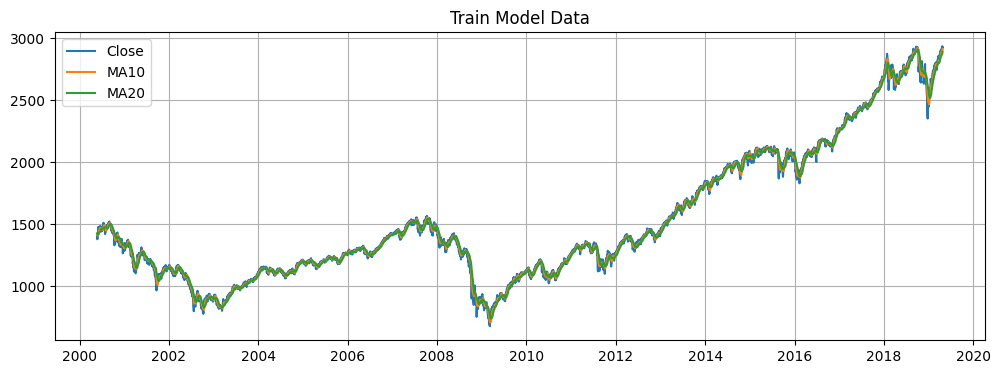

(595, 10, 3)
(595,)


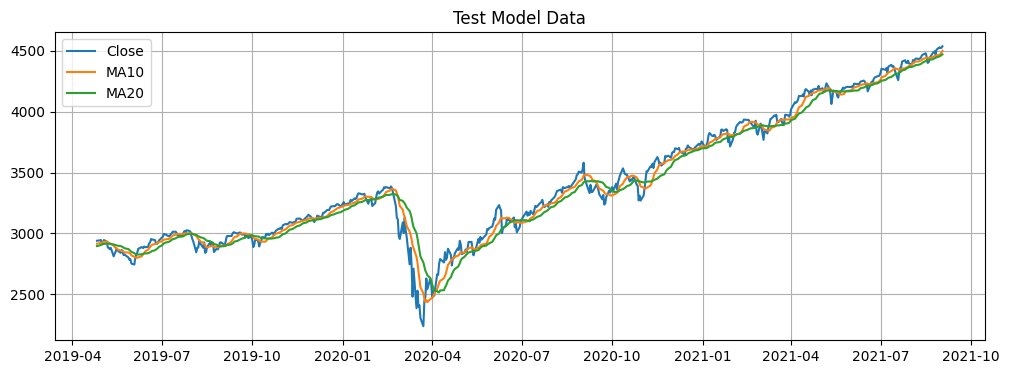

(595, 10, 3)
(595,)


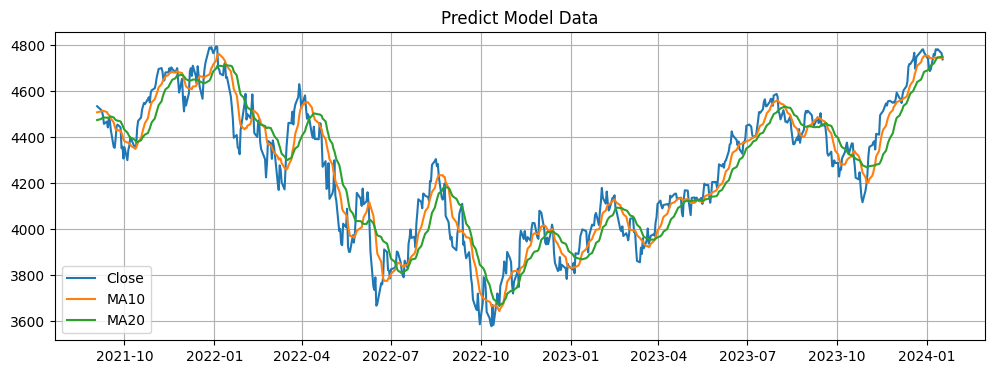

In [8]:
train, test, predict = split_train_and_test_data(data, target, dates)


# Show data:

print(train["x"].shape)
print(train["y"].shape)
plt = config_chart('Train Model Data')
plt.plot(train['dates'][:, 0], train['x'][:, 0])
plt.legend(SEQUENCE_COLUMNS)
plt.show()

print(test["x"].shape)
print(test["y"].shape)
plt = config_chart('Test Model Data')
plt.plot(test['dates'][:, 0], test['x'][:, 0])
plt.legend(SEQUENCE_COLUMNS)
plt.show()

print(predict["x"].shape)
print(predict["y"].shape)
plt = config_chart('Predict Model Data')
plt.plot(predict['dates'][:, 0], predict['x'][:, 0])
plt.legend(SEQUENCE_COLUMNS)
plt.show()


---

## For **prepare_tensors** function

In [9]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

---

## For **get_lstm_data** function

In [10]:
train, test, predict = get_lstm_data(SP500_TICKER)

(4759,)
(4759, 10, 3)
(4759, 10)
2
[[1461.67  1438.716 1429.996]
 [1456.95  1446.259 1432.453]
 [1446.    1453.057 1433.705]
 [1469.44  1457.756 1434.559]
 [1470.54  1462.75  1434.784]
 [1478.73  1465.742 1436.33 ]
 [1464.46  1464.462 1437.693]
 [1486.    1466.299 1441.645]
 [1475.95  1468.11  1445.407]
 [1479.13  1468.887 1450.67 ]]
['2000-06-08T00:00:00.000000000' '2000-06-09T00:00:00.000000000'
 '2000-06-12T00:00:00.000000000' '2000-06-13T00:00:00.000000000'
 '2000-06-14T00:00:00.000000000' '2000-06-15T00:00:00.000000000'
 '2000-06-16T00:00:00.000000000' '2000-06-19T00:00:00.000000000'
 '2000-06-20T00:00:00.000000000' '2000-06-21T00:00:00.000000000']


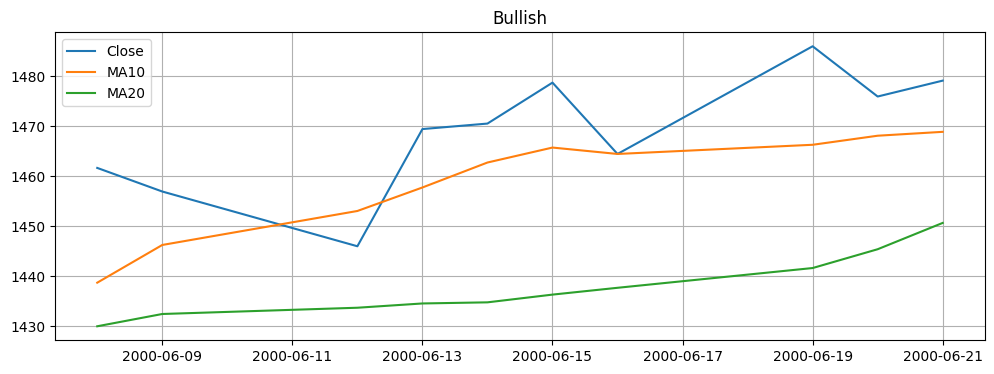

In [11]:
index = 10

print(train["y"].shape)
print(train["x"].shape) 
print(train["dates"].shape)

print(train["y"][index])
print(train["x"][index])
print(train["dates"][index])

plt = config_chart(TREND_CLASSES[train["y"][index]])
plt.plot(train["dates"][index], train["x"][index, :, 0])
plt.plot(train["dates"][index], train["x"][index, :, 1])
plt.plot(train["dates"][index], train["x"][index, :, 2])
plt.legend(SEQUENCE_COLUMNS)


(595, 10, 3)
(595,)
(595, 10)
[[2900.51  2895.078 2931.326]
 [2924.43  2899.123 2926.569]
 [2922.95  2897.609 2922.533]
 [2847.11  2890.455 2913.596]
 [2878.38  2890.023 2906.466]
 [2869.16  2884.307 2899.265]
 [2887.94  2889.041 2894.643]
 [2924.58  2896.739 2893.194]
 [2926.46  2900.517 2892.915]
 [2906.27  2898.779 2895.991]]
2
['2019-08-20T00:00:00.000000000' '2019-08-21T00:00:00.000000000'
 '2019-08-22T00:00:00.000000000' '2019-08-23T00:00:00.000000000'
 '2019-08-26T00:00:00.000000000' '2019-08-27T00:00:00.000000000'
 '2019-08-28T00:00:00.000000000' '2019-08-29T00:00:00.000000000'
 '2019-08-30T00:00:00.000000000' '2019-09-03T00:00:00.000000000']


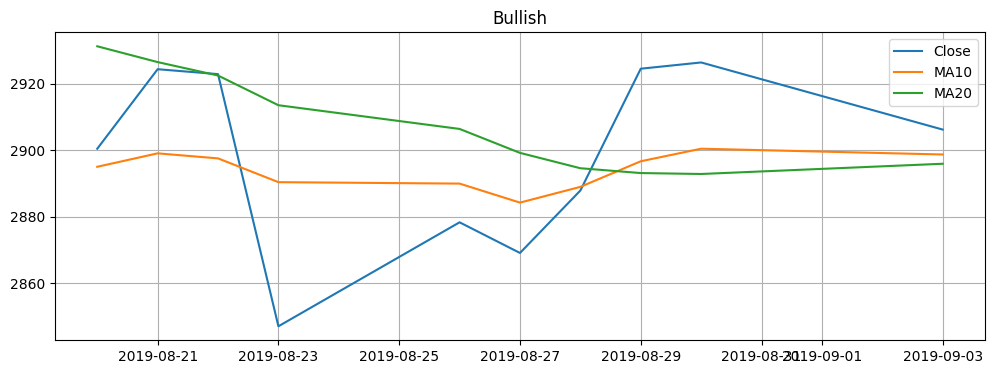

In [12]:
index = 80

print(test["x"].shape) 
print(test["y"].shape)
print(test["dates"].shape)

print(test["x"][index])
print(test["y"][index])
print(test["dates"][index])

plt = config_chart(TREND_CLASSES[test["y"][index]])
plt.plot(test["dates"][index], test["x"][index, :, 0])
plt.plot(test["dates"][index], test["x"][index, :, 1])
plt.plot(test["dates"][index], test["x"][index, :, 2])
plt.legend(SEQUENCE_COLUMNS)


(595, 10, 3)
(595,)
(595, 10)
[[4567.    4668.406 4670.072]
 [4513.04  4649.62  4664.192]
 [4577.1   4638.463 4660.019]
 [4538.43  4621.852 4652.937]
 [4591.67  4611.223 4647.644]
 [4686.75  4611.604 4646.897]
 [4701.21  4612.655 4647.695]
 [4667.45  4609.254 4648.732]
 [4712.02  4620.994 4651.869]
 [4668.97  4622.364 4651.175]]
1
['2021-11-30T00:00:00.000000000' '2021-12-01T00:00:00.000000000'
 '2021-12-02T00:00:00.000000000' '2021-12-03T00:00:00.000000000'
 '2021-12-06T00:00:00.000000000' '2021-12-07T00:00:00.000000000'
 '2021-12-08T00:00:00.000000000' '2021-12-09T00:00:00.000000000'
 '2021-12-10T00:00:00.000000000' '2021-12-13T00:00:00.000000000']


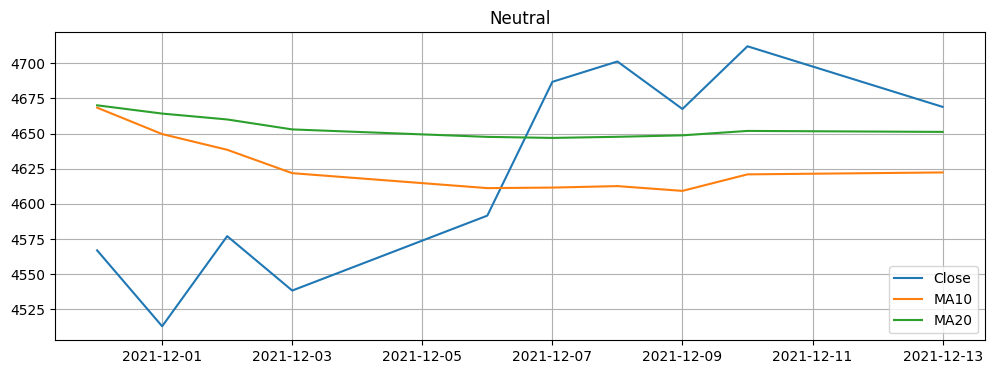

In [13]:
index = 60

print(predict["x"].shape) 
print(predict["y"].shape)
print(predict["dates"].shape)

print(predict["x"][index])
print(predict["y"][index])
print(predict["dates"][index])

plt = config_chart(TREND_CLASSES[predict["y"][index]])
plt.plot(predict["dates"][index], predict["x"][index, :, 0])
plt.plot(predict["dates"][index], predict["x"][index, :, 1])
plt.plot(predict["dates"][index], predict["x"][index, :, 2])
plt.legend(SEQUENCE_COLUMNS)